# Basic usage

Go to:
    
  - [Notebook configuration](basic_usage.ipynb#Notebook-configuration)
  - [Getting started](basic_usage.ipynb#Getting-started)

## Notebook configuration

In [1]:
import sys

# Optional dependencies
import matplotlib as mpl
import matplotlib.pyplot as plt

import commonnn
from commonnn import cluster

In [2]:
# Version information
print("Python: ", *sys.version.split("\n"))

print("Packages:")
for package in [mpl, commonnn]:
    print(f"    {package.__name__}: {package.__version__}")

Python:  3.10.7 (main, Sep 27 2022, 11:41:38) [GCC 10.2.1 20210110]
Packages:
    matplotlib: 3.6.0
    commonnn: 0.0.1


We use [Matplotlib](https://matplotlib.org/) to create plots. The `matplotlibrc` file in the root directory of the `CommonNNClustering` repository is used to customize the appearance of the plots.

In [3]:
# Matplotlib configuration
mpl.rc_file("../../matplotlibrc", use_default_template=False)

In [4]:
# Axis property defaults for the plots
ax_props = {
    "aspect": "equal"
}

# Property defaults for plotted lines
dot_props = {
    "marker": "o",
    "markeredgecolor": "k"
}

## Getting started

The `commonnn.cluster` main module provides a `Clustering` class. An instance of this class is used to bundle input data (e.g. data points) with cluster results (cluster label assignments) alongside the clustering method (a fitter with a set of building blocks) and convenience functions for further analysis (not only in an Molecular Dynamics context). As a guiding principle, a `Clustering` object is always associated with one particular data set (possibly hierarchically decomposed) and allows varying cluster parameters.

<div class="alert alert-info">

**Info:** Refer also to the [__scikit-learn-extra__ project](https://github.com/scikit-learn-contrib/scikit-learn-extra) for an alternative API following a parameter centered approach to clustering as `sklearn_extra.cluster.CommonNNClustering`.

</div>

A `Clustering` can be initialized by passing *raw* input data to it. By default, this is expected to be a nested sequence, e.g. a list of lists. It will be understood as the coordinates of a number of data points in a feature space. Similar data structures, like a 2-dimensional NumPy array would be acceptable, as well. It is possible to use different kinds of input data formats instead, like for example pre-computed pairwise distances, and it is described later how to do it (refer to tutorials [__Clustering of scikit-learn toy data sets__](scikit_learn_datasets.ipynb) and [__Advanced usage__](advanced_usage.ipynb)).

In [5]:
# 2D Data points (list of lists, 12 points in 2 dimensions)
data_points = [   # Point index
    [0, 0],       # 0
    [1, 1],       # 1
    [1, 0],       # 2
    [0, -1],      # 3
    [0.5, -0.5],  # 4
    [2,  1.5],    # 5
    [2.5, -0.5],  # 6
    [4, 2],       # 7
    [4.5, 2.5],   # 8
    [5, -1],      # 9
    [5.5, -0.5],  # 10
    [5.5, -1.5],  # 11
    ]

clustering = cluster.Clustering(data_points)

When we cluster data points, we are essentially interested in cluster label assignments for these points. The labels will be exposed as the `labels` attribute on the `Clustering` instance, which is currently `None` because no clustering has been done yet.

In [6]:
clustering.labels is None

True

To cluster the points, we will use the `Clustering.fit` method. CommonNN clustering depends on two parameters:
  
  - `radius_cutoff`: Points are considered neighbours if the distance between them is not larger than this cutoff radius $r$.
  - `similarity_cutoff`: Points are assigned to the same cluster if they share at least this number of $n_\mathrm{c}$ common neighbours.
  
For the clustering procedure, we ultimately need to compute the neighbouring points with respect to the `radius_cutoff` for each point in the data set. Then we can determine if two points fulfill the criterion of being part of the same cluster. How this is done, can be controlled in detail but by default the input data points are assumed to be given in euclidean space and the neighbours are computed brute force. For larger data sets, it makes sense to use a different approach.

In [7]:
clustering.fit(radius_cutoff=2.0, similarity_cutoff=1)

-----------------------------------------------------------------------------------------------
#points   r         nc        min       max       #clusters %largest  %noise    time     
12        2.000     1         None      None      2         0.583     0.167     00:00:0.000
-----------------------------------------------------------------------------------------------



A clustering attempt returns and prints a comprehensive record of the cluster parameters and the outcome. You can suppress the recording with the keyword argument `record=False` and the printing with `v=False`:

  - **#points**: Number of data points in the data set.
  - **r**: Radius cutoff *r*.
  - **nc**: Common-nearest-neighour similarity cutoff $n_\mathrm{c}$.
  - **min**: Member cutoff (valid clusters need to have at least this many members).
  - **max**: Maximum cluster count (keep only the *max* largest clusters and disregard smaller clusters).
  - **#clusters**: Number of identified clusters.
  - **%largest**: Member share on the total number of points in the largest cluster.
  - **%noise**: Member share on the total number of points identified as noise (not part of any cluster).
  
The `min` (keyword argument `member_cutoff`) and `max` (keyword argument `max_clusters`) only take effect in an optional post processing step when `sort_by_size=True` (default). In this case, the clusters are sorted by their size, so that the first cluster (cluster 1) has the highest member count. Optionally, they are trimmed such that valid clusters have a minimum number of members (`member_cutoff`) and only the largest clusters are kept (`max_clusters`).

The outcome of the clustering are cluster label assignments for each point. Points classified as *noise* (not part of any cluster) are labeled 0. Integer labels larger than 0 indicate the membership of each point to one of the identified clusters. If clusters were sorted (`sort_by_size=True`), cluster 1 has the highest member count.

In [8]:
clustering.labels

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2])

The `labels` attribute of a cluster object always holds the result of the latest fit. All cluster results (from fits where `record=True`) are collected in a summary without storing the actual labels.

In [9]:
clustering.fit(radius_cutoff=1.5, similarity_cutoff=1, v=False)
print(*clustering.summary, sep="\n")

-----------------------------------------------------------------------------------------------
#points   r         nc        min       max       #clusters %largest  %noise    time     
12        2.000     1         None      None      2         0.583     0.167     00:00:0.000
-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------
#points   r         nc        min       max       #clusters %largest  %noise    time     
12        1.500     1         None      None      2         0.417     0.333     00:00:0.000
-----------------------------------------------------------------------------------------------



If you have [Pandas](https://pandas.pydata.org/) installed, the summary can be transformed into a handy `pandas.DataFrame`.

In [10]:
clustering.summary.to_DataFrame()

,n_points,radius_cutoff,similarity_cutoff,member_cutoff,max_clusters,n_clusters,ratio_largest,ratio_noise,execution_time
0,12,2.0,1,<NA>,<NA>,2,0.583333,0.166667,0.000056
1,12,1.5,1,<NA>,<NA>,2,0.416667,0.333333,0.000044


A `Clustering` object comes with a set of convenience methods that allow for example a quick look at a plot of the data points and a cluster result.

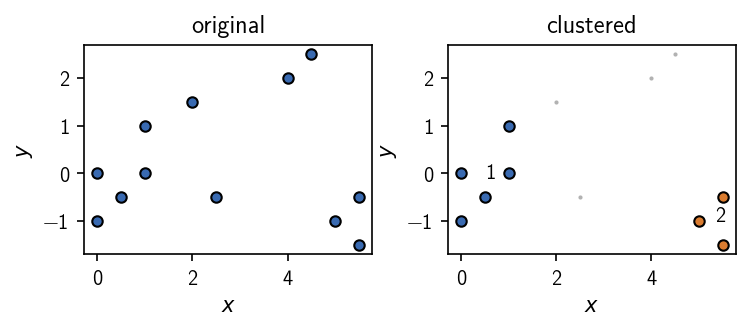

In [11]:
fig, ax = plt.subplots(1, 2)

ax[0].set_title("original")
clustering.evaluate(
    ax=ax[0], original=True,
    ax_props=ax_props, plot_props=dot_props
    )

ax[1].set_title("clustered")
clustering.evaluate(
    ax=ax[1],
    ax_props=ax_props, plot_props=dot_props
    )
fig.tight_layout()

It is possible to retrieve a view of the input data associated with a `Clustering` via:

In [12]:
clustering.input_data

array([[ 0. ,  0. ],
       [ 1. ,  1. ],
       [ 1. ,  0. ],
       [ 0. , -1. ],
       [ 0.5, -0.5],
       [ 2. ,  1.5],
       [ 2.5, -0.5],
       [ 4. ,  2. ],
       [ 4.5,  2.5],
       [ 5. , -1. ],
       [ 5.5, -0.5],
       [ 5.5, -1.5]])

<div class="alert alert-info">

**Info:** The *raw* data points that we passed here to create the `Clustering` object are internally wrapped into a specific input data type. `Clustering.input_data` is a shortcut for `Clustering._bundle._input_data.to_components_array()`. Depending on the used type, the data may, however, actually be stored in any possible format under `InputData._data`.
See [__Advanced usage__](advanced_usage.ipynb) for more information.
</div>